In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import statistics as stat

In [29]:
def generate_lattice(L, p):
    """Generate an L x L percolation configuration with probability p."""
    return np.random.random((L, L)) < p  # True (1) = filled, False (0) = empty

In [137]:
def plot_lattice(config, p, reachable):
    """Plot the lattice with filled/hollow dots and grid connections."""
    L = config.shape[0]
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Grid lines
    ax.set_xticks(np.arange(0, L, 1), ax.set_yticks(np.arange(0, L, 1)))
    ax.grid(color='gray', linestyle='-', linewidth=0.5)
    ax.set_xticklabels(np.arange(0, L, 1)), ax.set_yticklabels(np.arange(0, L, 1))
    
    # Plot filled (•) and hollow (◦) dots
    for i in range(L):
        for j in range(L):
            if config[i, j]:  # Filled site
                ax.plot(j, L - 1 - i, 'o', markersize=10, color='purple', fillstyle='full')
            else:  # Empty site
                ax.plot(j, L - 1 - i, 'o', markersize=10, color='purple', fillstyle='none')
    if reachable:
        c='at least one'
    else:
        c='no'
    ax.set_title(f"Site Percolation (L={L}, p={p:.2f}). There is {c} bridge.", pad=20)
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.tight_layout()
    plt.show()

In [129]:
def is_reachable(lattice):
    """
    Check for left-to-right percolation using DFS (stack-based).
    Args:
        lattice: 2D list of booleans (True = open, False = closed).
    Returns:
        bool: True if percolation exists, False otherwise.
    """
    size = len(lattice)
    
    # Check if at least one open site exists in each row (optional optimization)
    for i in range(size):
        if not any(lattice[i]):
            return False
    
    visited = [[False for _ in range(size)] for _ in range(size)]
    stack = []
    
    # Initialize stack with all open left-edge sites
    for i in range(size):
        if lattice[i][0]:
            stack.append((i, 0))
            visited[i][0] = True
    
    # Directions: up, down, left, right
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    while stack:
        x, y = stack.pop()  # Pop from top (LIFO)
        
        # Reached right edge?
        if y == size - 1:
            return True
        
        # Explore neighbors (order matters for DFS)
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < size and 0 <= ny < size:
                if lattice[nx][ny] and not visited[nx][ny]:
                    visited[nx][ny] = True
                    stack.append((nx, ny))  # Push to stack
    
    return False

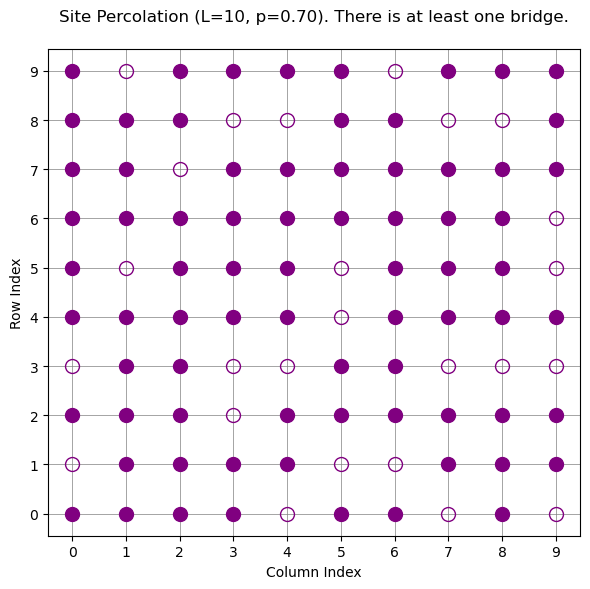

In [138]:
p=0.7
x=generate_lattice(10, p)
plot_lattice(x, p, is_reachable(x))

In [107]:
l = 10
n=100
p_range = np.arange(0.1, 1.0, 0.01)
prob=[]
for p in p_range:
    count = 0
    for _ in range(n):
        lattice = generate_lattice(l, p)
        if is_reachable(lattice):
            count += 1
    prob.append(count / n)

In [108]:
l2 = 100
n=100
p_range = np.arange(0.1, 1.0, 0.01)
prob_2=[]
for p in p_range:
    count = 0
    for _ in range(n):
        lattice = generate_lattice(l2, p)
        if is_reachable(lattice):
            count += 1
    prob_2.append(count / n)

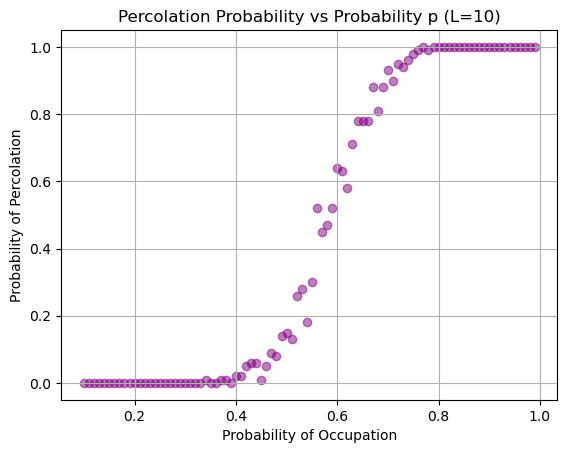

In [149]:
plt.scatter(p_range, prob, color='purple', alpha=0.5,)
#plt.plot(p_range, prob, color='purple')
plt.xlabel('Probability of Occupation')
plt.ylabel('Probability of Percolation')
plt.title(f'Percolation Probability vs Probability p (L={l})')
plt.grid()
plt.show()

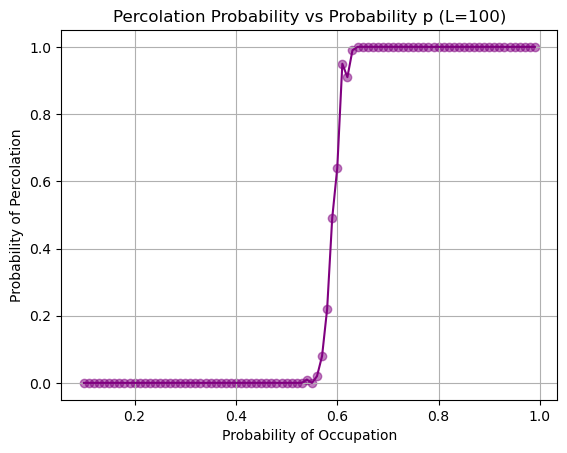

In [150]:
plt.scatter(p_range, prob_2, color='purple', alpha=0.5, label = 'L=100')
plt.plot(p_range, prob_2, color='purple')
plt.xlabel('Probability of Occupation')
plt.ylabel('Probability of Percolation')
plt.title(f'Percolation Probability vs Probability p (L={l2})')
plt.grid()
plt.show()

## Counting Clusters

Pseudo code:

burned = 0
num_clusters = 0  # Initialize cluster counter

while burned < total_occupied_sites:
    i = select_unburned_site()  # Find a new unburned occupied site
    if i == -1:  # No more unburned sites
        break
    num_clusters += 1  # New cluster found
    n = 0
    go_through_tree(i, n)
    burned += n
return num_clusters  # Now returns the number of clusters

def go_through_tree(i, n):
    if tree[i][0] != 0:  # Left child exists and is occupied
        go_through_tree(tree[i][0], n)
    if tree[i][1] != 0:  # Right child exists and is occupied
        go_through_tree(tree[i][1], n)
    tree[i][0] = 0  # Burn left child
    tree[i][1] = 0  # Burn right child
    n += 1  # Increment cluster size

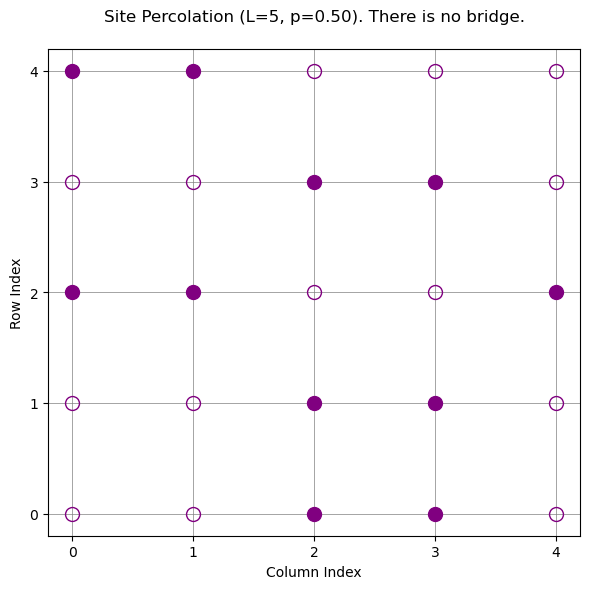

Found cluster 1 of size 4
Found cluster 2 of size 2
Found cluster 3 of size 2
Found cluster 4 of size 2
Found cluster 5 of size 1

Final Results:
Number of clusters: 5
Total occupied sites: 11


In [183]:
def select_unburned_site(lattice):
    """Randomly select an unburned occupied site from the lattice."""
    unburned = np.argwhere(lattice)
    return tuple(random.choice(unburned)) if len(unburned) > 0 else None

def burn_cluster(i, lattice):
    """Starts burning a cluster from the given site using DFS."""
    stack = [i] # Start with the initial site contains the sites to be burned
    cluster_size = 0
    
    while stack:
        x, y = stack.pop()
        if not lattice[x][y]: # Already burned or empty
            continue
            
        lattice[x][y] = False  # Burn the site
        cluster_size += 1
        
        # Add neighbors to stack
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(lattice) and 0 <= ny < len(lattice[0]) and lattice[nx][ny]:
                stack.append((nx, ny))
    
    return cluster_size

# Initialize
size = 5
p = 0.5
lattice = generate_lattice(size, p)
plot_lattice(lattice, p, is_reachable(lattice))

burned = 0
num_clusters = 0
total_occupied = np.sum(lattice)

while burned < total_occupied:
    site = select_unburned_site(lattice)
    if site is None:
        break
        
    num_clusters += 1
    cluster_size = burn_cluster(site, lattice)
    burned += cluster_size
    print(f"Found cluster {num_clusters} of size {cluster_size}")

print(f"\nFinal Results:")
print(f"Number of clusters: {num_clusters}")
print(f"Total occupied sites: {total_occupied}")

In [ ]:
# Initialize
size = 50
prob = np.arange(0.01, 1.0, 0.01)
cluster_counts_mean = []
for p in prob:
    cluster_counts = []
    for i in range(100):
        lattice = generate_lattice(size, p)
        #plot_lattice(lattice, p, is_reachable(lattice))

        burned = 0
        num_clusters = 0
        total_occupied = np.sum(lattice)

        while burned < total_occupied:
            site = select_unburned_site(lattice)
            if site is None:
                break
                
            num_clusters += 1
            cluster_size = burn_cluster(site, lattice)
            burned += cluster_size
        cluster_counts.append(num_clusters)
    cluster_counts_mean.append(stat.mean(cluster_counts))

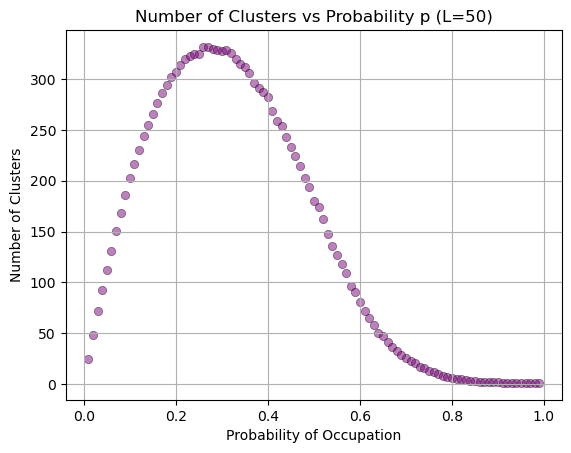

In [190]:
plt.scatter(prob, cluster_counts_mean, color='purple', alpha=0.5, edgecolors='black', linewidth=0.5)
plt.xlabel('Probability of Occupation')
plt.ylabel('Number of Clusters')
plt.title(f'Number of Clusters vs Probability p (L={size})')
plt.grid()

In [207]:
def ant_walk(start_pos, lattice, max_steps):
    x, y = start_pos
    size = len(lattice)
    
    for _ in range(max_steps):
        # Find possible directions
        directions = []
        if x + 1 < size and lattice[x+1][y]:
            directions.append((1, 0))
        if x - 1 >= 0 and lattice[x-1][y]:
            directions.append((-1, 0))
        if y + 1 < size and lattice[x][y+1]:
            directions.append((0, 1))
        if y - 1 >= 0 and lattice[x][y-1]:
            directions.append((0, -1))
        
        # If no directions available, stop
        if not directions:
            break
            
        # Choose a random direction and move
        dx, dy = random.choice(directions)
        x += dx
        y += dy
    
    # Return squared distance from starting position
    return (x - start_pos[0])**2 + (y - start_pos[1])**2

# Example usage:
size = 20
lattice = generate_lattice(size, 0.7)
start_pos = select_unburned_site(lattice)
distance_squared = ant_walk(start_pos, lattice,100)
print(distance_squared)

34


In [219]:
size = 20
p=0.7
d_mean=[]
for steps in np.arange(10, 1000, 5):
    d=[]
    for i in range(100):
        lattice = generate_lattice(size, 0.7)
        start_pos = select_unburned_site(lattice)
        distance_squared = ant_walk(start_pos, lattice, steps)
        d.append(distance_squared)
    d_mean.append(stat.mean(d))

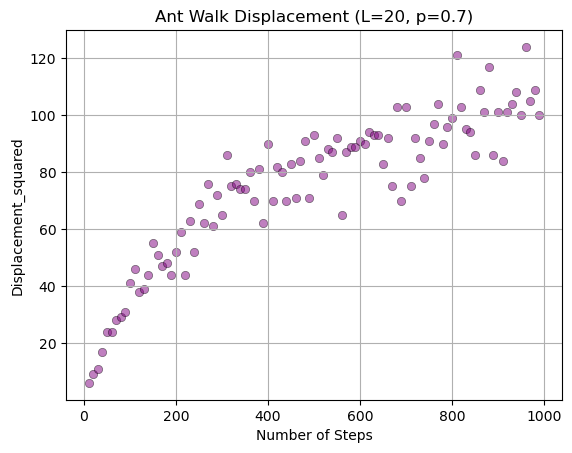

In [ ]:
plt.scatter(np.arange(10, 1000, 5), d_mean, alpha=0.5, edgecolors='black', linewidths=0.5, color = 'purple')
plt.xlabel('Number of Steps')
plt.ylabel('Displacement_squared')
plt.title(f'Ant Walk Displacement (L={size}, p={p})')
plt.grid()

In [216]:
size = 20
p=0.5
d_mean=[]
for steps in np.arange(10, 1000, 5):
    d=[]
    for i in range(100):
        lattice = generate_lattice(size, 0.7)
        start_pos = select_unburned_site(lattice)
        distance_squared = ant_walk(start_pos, lattice, steps)
        d.append(distance_squared)
    d_mean.append(stat.mean(d))

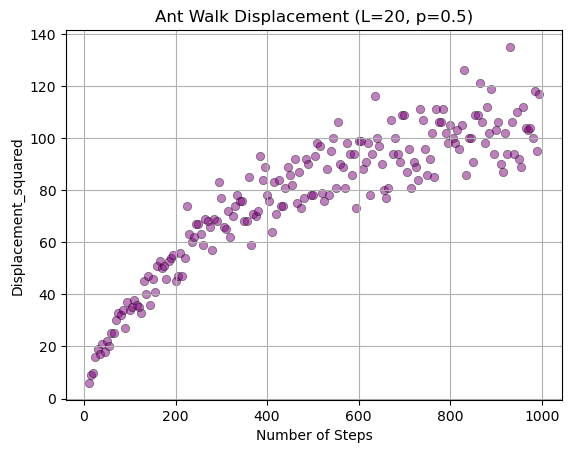

In [218]:
plt.scatter(np.arange(10, 1000, 5), d_mean, alpha=0.5, edgecolors='black', linewidths=0.5, color = 'purple')
plt.xlabel('Number of Steps')
plt.ylabel('Displacement_squared')
plt.title(f'Ant Walk Displacement (L={size}, p={p})')
plt.grid()

## Kinetic Percolation

In [ ]:
def kinetic_percolation(lattice, p, steps):
    """
    Simulate kinetic percolation on a lattice.
    
    Args:
        lattice: 2D array representing the lattice (0=empty, 1=occupied)
        p: Probability of occupying a site
        steps: Maximum number of steps to simulate
        
    Returns:
        The modified lattice after percolation
    """
    size = len(lattice)
    center = size // 2
    lattice[center][center] = 1  # Start with occupied center
    
    visited = set()
    visited.add((center, center))
    frontier = [(center, center)]
    
    for _ in range(steps):
        if not frontier:
            break
            
        new_frontier = []
        for x, y in frontier:
            # Check neighbors
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                
                # Check bounds and if already visited
                if (0 <= nx < size and 0 <= ny < size and 
                    (nx, ny) not in visited):
                    
                    # Occupy with probability p
                    if random.random() < p:
                        lattice[nx][ny] = 1
                        visited.add((nx, ny))
                        new_frontier.append((nx, ny))
        
        frontier = new_frontier
    
    return lattice

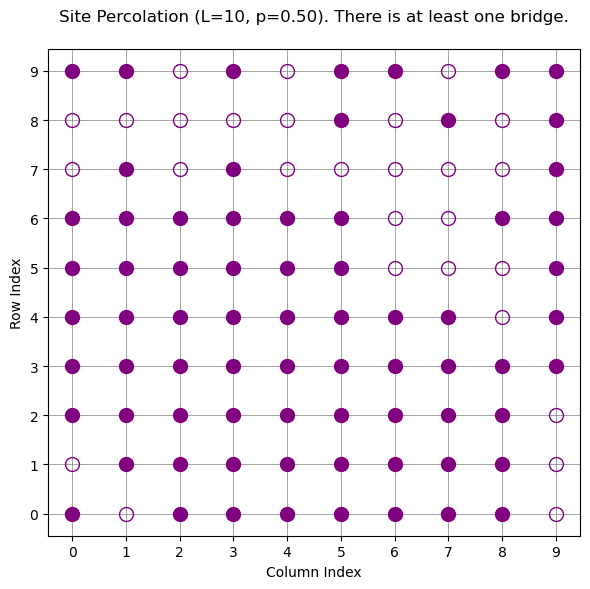

In [259]:
lattice = generate_lattice(10, 0.5)
new_lattice = kinetic_percolation(lattice, 0.5, 100)
plot_lattice(new_lattice, 0.5, is_reachable(new_lattice))

In [248]:
def kinetic_percolation(lattice, p, steps):
    size = len(lattice)
    center = size // 2
    lattice[center][center] = 1  # Start with occupied center
    
    visited = set([(center, center)])
    frontier = [(center, center)]
    
    for _ in range(steps):
        if not frontier:
            break
        while frontier:
            # Pop from the end to simulate a queue
            # (could also use random.choice for more randomness)    
            x, y = frontier.pop()
            
            # Check neighbors
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                
                # Check bounds and if unoccupied
                if (0 <= nx < size and 0 <= ny < size and  (nx, ny) not in visited):
                    
                    # Occupy with probability p
                    if random.random() < p:
                        lattice[nx][ny] = 1
                        visited.add((nx, ny))
                        frontier.append((nx, ny))

    return lattice

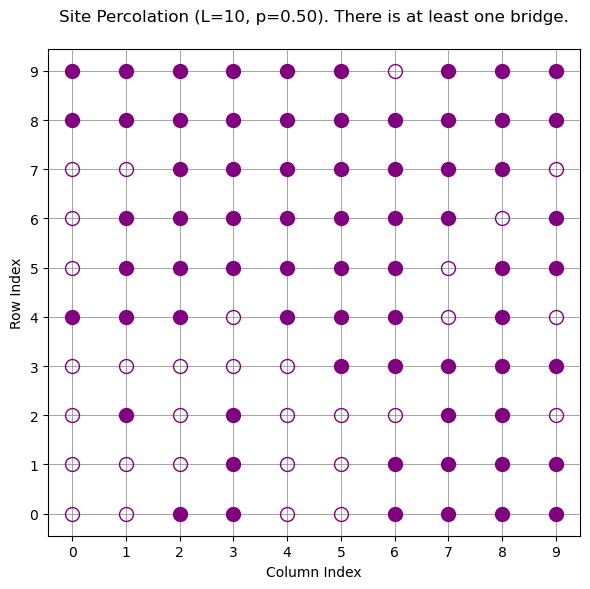

[[ True  True  True  True  True  True False  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True False]
 [False  True  True  True  True  True  True  True False  True]
 [False  True  True  True  True  True  True False  True  True]
 [ True  True  True False  True  True  True False  True False]
 [False False False False False  True  True  True  True  True]
 [False  True False  True False False False  True  True False]
 [False False False  True False False  True  True  True  True]
 [False False  True  True False False  True  True  True  True]]


In [253]:
lattice = generate_lattice(10, 0.5)
new_lattice = kinetic_percolation(lattice, 0.5, 10)
plot_lattice(new_lattice, 0.5, is_reachable(new_lattice))
print(new_lattice)